In [2]:
from openai import OpenAI
import pandas as pd

client = OpenAI(
    api_key="XXX", #hidden for privacy
)

def answer(prompt):
    response = client.chat.completions.create(
        model = "gpt-4o-2024-08-06",
        messages=[
                {"role": "system", "content": "You are an expert in conducting sentiment analysis."},
                {"role": "user", "content":prompt}],
        temperature = 0
    )
    return response.choices[0].message.content.strip()

In [3]:
def feed(i,df):
    text = (
    "Evaluate the sentiment toward cultured meat that this tweet expresses: " + df['Tweet'][i] + '\n'+'Return your response only as positive (which indicates positive sentiment toward cultured meat is expressed), negative (which indicates negative sentiment toward cultured meat is expressed), neutral (which indicates no sentiment toward cultured meat is expressed), or combination (which indicates that both positive and negative sentiments toward cultured meat are expressed).')
    return text

In [4]:
import pandas as pd
Paris_1 = pd.read_csv('Coding_Paris_Week1.csv')
Paris_2 = pd.read_csv('Coding_Paris_Week2.csv')
Paris_3 = pd.read_csv('Coding_Paris_Week3.csv')
Paris_4 = pd.read_csv('Coding_Paris_Week4.csv')
Paris_5 = pd.read_csv('Coding_Paris_Week5.csv')
Shawn_1 = pd.read_csv('Coding_Shawn_Week1.csv')
Shawn_2 = pd.read_csv('Coding_Shawn_Week2.csv')
Shawn_3 = pd.read_csv('Coding_Shawn_Week3.csv')
Shawn_4 = pd.read_csv('Coding_Shawn_Week4.csv')
Shawn_5 = pd.read_csv('Coding_Shawn_Week5.csv')
Tianli_1 = pd.read_csv('Coding_Tianli_Week1.csv')
Tianli_2 = pd.read_csv('Coding_Tianli_Week2.csv')
Tianli_3 = pd.read_csv('Coding_Tianli_Week3.csv')
Tianli_4 = pd.read_csv('Coding_Tianli_Week4.csv')
Tianli_5 = pd.read_csv('Coding_Tianli_Week5.csv')
# Combine all the data frames into one
combined_df = pd.concat([
    Paris_1, Paris_2, Paris_3, Paris_4, Paris_5,
    Shawn_1, Shawn_2, Shawn_3, Shawn_4, Shawn_5,
    Tianli_1, Tianli_2, Tianli_3, Tianli_4, Tianli_5
], ignore_index=True)

combined_df['Sentiment'] = combined_df['Sentiment'].astype(int)

In [5]:
print(feed(1,combined_df))

Evaluate the sentiment toward cultured meat that this tweet expresses: The future will be full of lab grown meat: http://t.co/xFPgLz0yg2 http://t.co/u1voAdrQ0a http://t.co/yxksEjq3kZ
Return your response only as positive (which indicates positive sentiment toward cultured meat is expressed), negative (which indicates negative sentiment toward cultured meat is expressed), neutral (which indicates no sentiment toward cultured meat is expressed), or combination (which indicates that both positive and negative sentiments toward cultured meat are expressed).


In [6]:
train_df = combined_df.sample(frac=0.8, random_state=2024)

# remaining 20% as validation set
validation_df = combined_df.drop(train_df.index)

In [7]:
validation_df = validation_df.reset_index(drop=True)
validation_df

,Tweet,Sentiment
0,@csimpsyo @Tbogin @jonlovett Cultured meat,3
1,RT @ndonyourtable What's the difference betwee...,3
2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3
3,This year is the first time cultivated meat ha...,3
4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3
...,...,...
4590,@Joseph_Plant What goes into lab grown meat? I...,2
4591,Google Funding Lab Grown Meat… No Animals Kill...,1
4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1
4593,@MusadADroid @AuthorGusPegel The answer would ...,4


# First Run

In [8]:
import time
sentiment = []
start = time.time()
count = 0
for i, v in validation_df.iterrows():
    sentiment.append(answer(feed(i,validation_df)))
time_used = time.time()-start
time_used

1998.0906779766083

In [9]:
len(sentiment)

4595

In [10]:
validation_df['GPT-4o_1'] = [i for i in sentiment]

In [11]:
validation_df

,Tweet,Sentiment,GPT-4o_1
0,@csimpsyo @Tbogin @jonlovett Cultured meat,3,neutral
1,RT @ndonyourtable What's the difference betwee...,3,neutral
2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3,neutral
3,This year is the first time cultivated meat ha...,3,neutral
4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3,positive
...,...,...,...
4590,@Joseph_Plant What goes into lab grown meat? I...,2,Negative
4591,Google Funding Lab Grown Meat… No Animals Kill...,1,positive
4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1,positive
4593,@MusadADroid @AuthorGusPegel The answer would ...,4,positive


In [12]:
with open('ZS_GPT-4o_noCB_20250102_round1.txt', 'w') as f:
    for item in sentiment:
        f.write(f"{item}\n")

# Second Run

In [13]:
import time
sentiment = []
start = time.time()
count = 0
for i, v in validation_df.iterrows():
    sentiment.append(answer(feed(i,validation_df)))
time_used = time.time()-start
time_used

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [14]:
len(sentiment)

1713

In [15]:
import time
#sentiment = []
start = time.time()
count = 0
for i, v in validation_df[1713:].iterrows():
    sentiment.append(answer(feed(i,validation_df)))
time_used = time.time()-start
time_used

1264.9165670871735

In [16]:
with open('ZS_GPT-4o_noCB_20250102_round2.txt', 'w') as f:
    for item in sentiment:
        f.write(f"{item}\n")

In [17]:
validation_df['GPT-4o_2'] = [i for i in sentiment]

In [18]:
import time
sentiment = []
start = time.time()
count = 0
for i, v in validation_df.iterrows():
    sentiment.append(answer(feed(i,validation_df)))
time_used = time.time()-start
time_used

1824.4526069164276

In [19]:
validation_df['GPT-4o_3'] = [i for i in sentiment]

In [20]:
validation_df.to_csv('ZS_GPT-4o_noCB_20250102.csv')

In [1]:
import pandas as pd
validation_df = pd.read_csv('ZS_GPT-4o_noCB_20250102.csv')  

In [2]:
validation_df['GPT-4o_lowercase_3'] = validation_df['GPT-4o_3'].str.lower()
validation_df['GPT-4o_lowercase_2'] = validation_df['GPT-4o_2'].str.lower()
validation_df['GPT-4o_lowercase_1'] = validation_df['GPT-4o_1'].str.lower()

In [3]:
# 定义映射关系
sentiment_map = {
    'positive':1,
    'negative':2,
    'neutral':3,
    'combination':4
}

# 将Sentiment列中的数字替换为对应的情感标签
validation_df['GPT-4o_number_3'] = validation_df['GPT-4o_lowercase_3'].map(sentiment_map).fillna(0).astype(int)
validation_df['GPT-4o_number_2'] = validation_df['GPT-4o_lowercase_2'].map(sentiment_map).fillna(0).astype(int)
validation_df['GPT-4o_number_1'] = validation_df['GPT-4o_lowercase_1'].map(sentiment_map).fillna(0).astype(int)

In [4]:
import krippendorff

# Select only the relevant columns for Krippendorff's alpha calculation
data = validation_df[['GPT-4o_number_1', 'GPT-4o_number_2', 'GPT-4o_number_3']].values.T

# Calculate Krippendorff's alpha
alpha = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')

print(f"Krippendorff's alpha: {alpha}")

Krippendorff's alpha: 0.9709538394106864


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['GPT-4o_number_1'])
precision = precision_score(validation_df['Sentiment'], validation_df['GPT-4o_number_1'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['GPT-4o_number_1'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['GPT-4o_number_1'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7286180631120783
Precision: 0.7557847357452447
Recall: 0.7286180631120783
F1 Score: 0.7367636943895867


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['GPT-4o_number_2'])
precision = precision_score(validation_df['Sentiment'], validation_df['GPT-4o_number_2'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['GPT-4o_number_2'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['GPT-4o_number_2'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7294885745375408
Precision: 0.7576920505318431
Recall: 0.7294885745375408
F1 Score: 0.738223022309447


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['GPT-4o_number_3'])
precision = precision_score(validation_df['Sentiment'], validation_df['GPT-4o_number_3'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['GPT-4o_number_3'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['GPT-4o_number_3'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7273122959738847
Precision: 0.7564994026309529
Recall: 0.7273122959738847
F1 Score: 0.7362131106877823


In [33]:
validation_forconfusion1 = validation_df.loc[validation_df['GPT-4o_number_1']!=0]
validation_forconfusion2 = validation_df.loc[validation_df['GPT-4o_number_2']!=0]
validation_forconfusion3 = validation_df.loc[validation_df['GPT-4o_number_3']!=0]

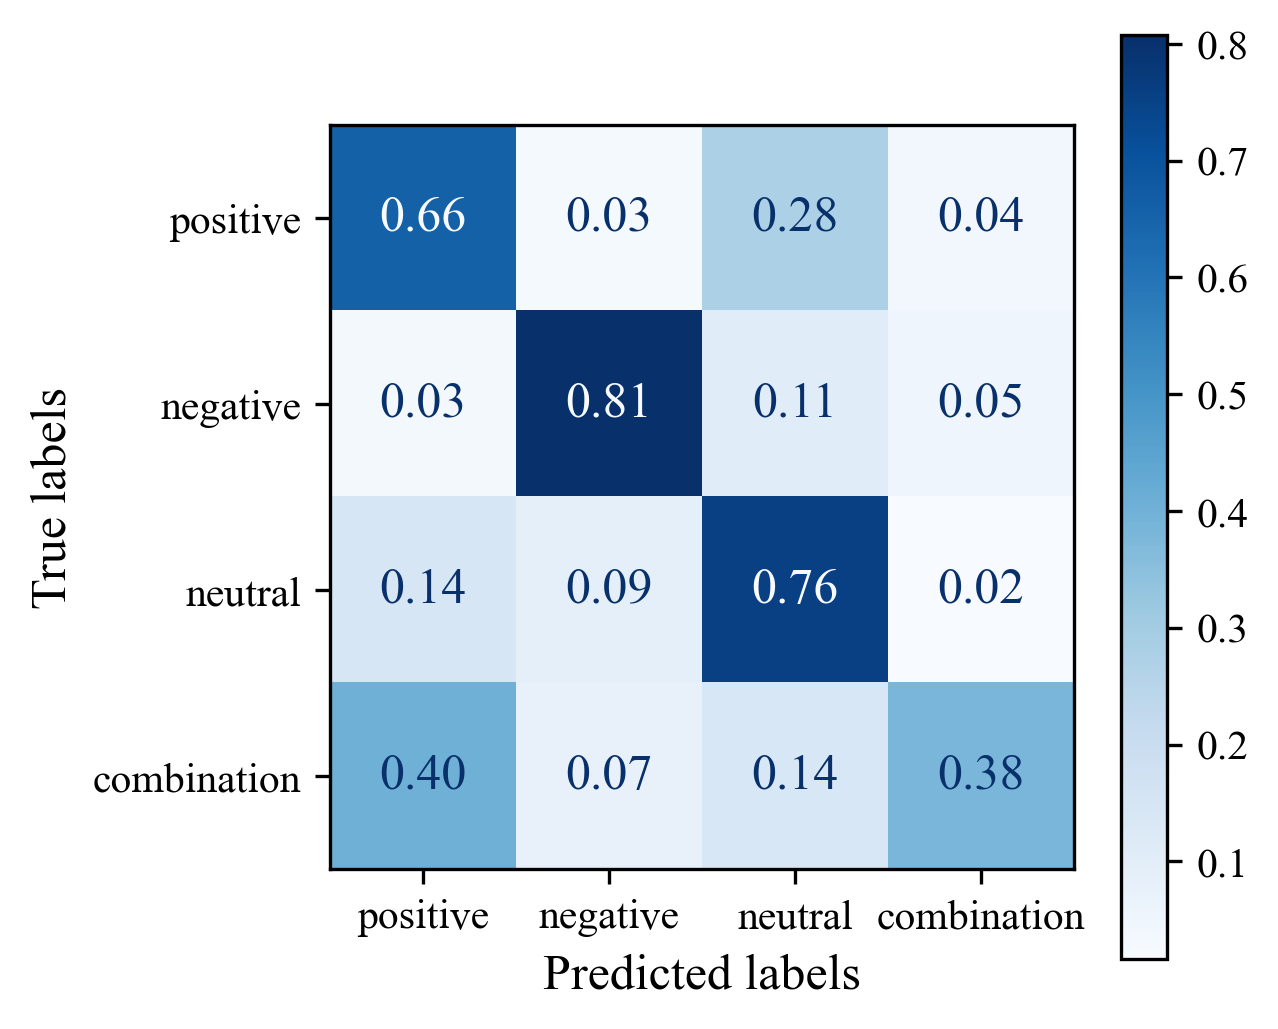

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Define a mapping of numeric labels to sentiment labels
label_mapping = {0: 'positive', 1: 'negative', 2: 'neutral', 3: 'combination'}
sentiment_labels = [label_mapping[i] for i in range(4)]  # List of sentiment labels in order

# Generate normalized confusion matrices for each run
conf_matrix1 = confusion_matrix(
    validation_df['Sentiment'], 
    validation_df['GPT-4o_number_1'], 
    normalize='true'
)
conf_matrix2 = confusion_matrix(
    validation_df['Sentiment'], 
    validation_df['GPT-4o_number_2'], 
    normalize='true'
)
conf_matrix3 = confusion_matrix(
    validation_df['Sentiment'], 
    validation_df['GPT-4o_number_3'], 
    normalize='true'
)

# Calculate the mean normalized confusion matrix
mean_conf_matrix = (conf_matrix1 + conf_matrix2 + conf_matrix3) / 3

# Create a ConfusionMatrixDisplay object for visualization, with customized labels
disp = ConfusionMatrixDisplay(confusion_matrix=mean_conf_matrix, display_labels=sentiment_labels)

# Plot the mean normalized confusion matrix
plt.rc('font', family='Times New Roman')  # Set the font to Times New Roman
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)  # Increase figure size and resolution
disp.plot(cmap='Blues', ax=ax, values_format=".2f")  # Format numbers as percentages with two decimals

# Customize the text size of numbers in the matrix
for text in disp.text_.ravel():
    text.set_fontsize(12)  # Increase font size of numbers in the matrix

# Set titles and labels with the desired font
plt.xlabel("Predicted labels", fontname='Times New Roman', fontsize=12)
plt.ylabel("True labels", fontname='Times New Roman', fontsize=12)
#plt.title("Mean Normalized Confusion Matrix Across 3 Runs", fontname='Times New Roman', fontsize=14)
plt.show()
